


Name:- Sudhir Kumar Singh 

Roll no:- TEAD23152 

Test data 1 is classified as: Class A
Test data 2 is classified as: Class A


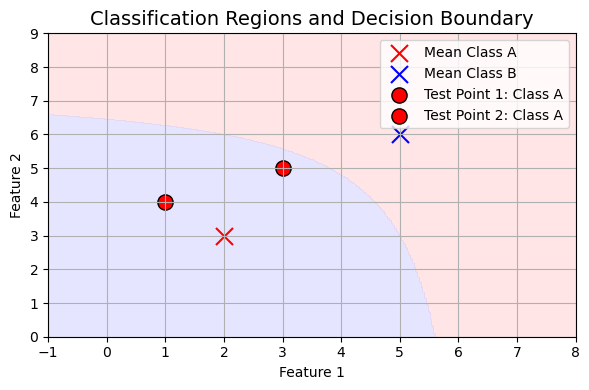

In [2]:
import numpy as np
import matplotlib.pyplot as plt

# Mean and covariance for Class A
mean_class_A = np.array([2, 3])
cov_class_A = np.array([[1, 0.5], [0.5, 1]])

# Mean and covariance for Class B
mean_class_B = np.array([5, 6])
cov_class_B = np.array([[1, -0.5], [-0.5, 1]])

# Discriminant function
def discriminant_function(feature_vector, mean, covariance_matrix):
    inverse_covariance_matrix = np.linalg.inv(covariance_matrix)
    diff = feature_vector - mean
    exponent = -0.5 * np.dot(np.dot(diff, inverse_covariance_matrix), diff.T)
    discriminant_value = exponent - 0.5 * np.log(np.linalg.det(covariance_matrix))
    return discriminant_value

# Classification function
def classify_object(feature_vector):
    d_A = discriminant_function(feature_vector, mean_class_A, cov_class_A)
    d_B = discriminant_function(feature_vector, mean_class_B, cov_class_B)
    return "Class A" if d_A > d_B else "Class B"

# Test data points
test_data_1 = np.array([1, 4])
test_data_2 = np.array([3, 5])
test_points = [test_data_1, test_data_2]

# Classification results
results = [classify_object(p) for p in test_points]

print("\n\n")
print("Name:- Sudhir Kumar Singh \n")
print("Roll no:- TEAD23152 \n")

for i, res in enumerate(results, 1):
    print(f"Test data {i} is classified as: {res}")

# ========== Visualization ==========

# Grid for decision boundary visualization
x_min, x_max = -1, 8
y_min, y_max = 0, 9
xx, yy = np.meshgrid(np.linspace(x_min, x_max, 300), np.linspace(y_min, y_max, 300))

# Calculate decision boundary
zz = np.zeros(xx.shape)
for i in range(xx.shape[0]):
    for j in range(xx.shape[1]):
        point = np.array([xx[i, j], yy[i, j]])
        d_A = discriminant_function(point, mean_class_A, cov_class_A)
        d_B = discriminant_function(point, mean_class_B, cov_class_B)
        zz[i, j] = 1 if d_A > d_B else 0  # 1 for Class A, 0 for Class B

# Plotting
plt.figure(figsize=(6, 4))
plt.contourf(xx, yy, zz, levels=1, colors=["#FFCCCC", "#CCCCFF"], alpha=0.5)

# Plot class means
plt.scatter(*mean_class_A, color='red', marker='x', s=150, label='Mean Class A')
plt.scatter(*mean_class_B, color='blue', marker='x', s=150, label='Mean Class B')

# Plot test points
colors = {'Class A': 'red', 'Class B': 'blue'}
for i, (point, label) in enumerate(zip(test_points, results)):
    plt.scatter(*point, color=colors[label], edgecolor='black', s=120,
                label=f'Test Point {i+1}: {label}')

# Final plot settings
plt.title("Classification Regions and Decision Boundary", fontsize=14)
plt.xlabel("Feature 1")
plt.ylabel("Feature 2")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()
